In [ ]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
# pancard detector

# New Section

In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [ ]:
original= Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg',stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)

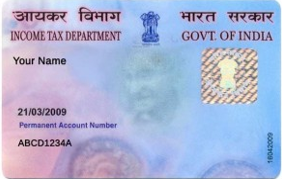

In [ ]:
tampered

In [ ]:
#file  mormat of the source file

print("Original image format :",original.format)
print("tampered image format :",tampered.format)
# Image size in ppixels . the size is given as a 2-type
print("Original image size:",original.size)
print("tampered image size:",tampered.size)

Original image format : JPEG
tampered image format : PNG
Original image size: (1200, 800)
tampered image size: (282, 179)


In [ ]:
original=original.resize((250,160))
print(original.size)
original.save("pan_card_tampering/image/original.png")#save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save("pan_card_tampering/image/tampered.png")#saves image

(250, 160)
(250, 160)


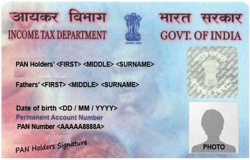

In [ ]:
original

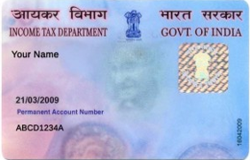

In [ ]:
tampered

In [ ]:
#load the two input images
original = cv2.imread('pan_card_tampering/image/original.png')
tampered= cv2.imread('pan_card_tampering/image/tampered.png')

In [ ]:
# covert this images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [ ]:
#compute the structural similarity index
(score,diff) = structural_similarity(original_gray,tampered_gray,full=True)
diff= (diff * 255).astype("uint8")
print("SSIM:{}",format(score))

SSIM:{} 0.31678790332739426


In [ ]:
#calculate threshold and contours
thresh= cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


In [ ]:
for c in cnts:
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x+w,y+h),(0,255),2)
  cv2.rectangle(original,(x,y),(x+w,y+h),(0,255),2)


Original Format Image


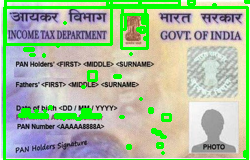

In [ ]:
print("Original Format Image")
Image.fromarray(original)

Tampered Image


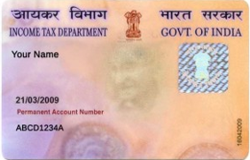

In [ ]:
print("Tampered Image")
Image.fromarray(tampered)

Different Image


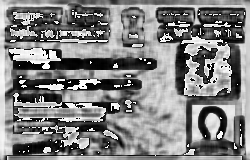

In [ ]:
print("Different Image")
Image.fromarray(diff)

Threshold Image


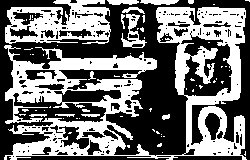

In [ ]:
print("Threshold Image")
Image.fromarray(thresh)